In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
((train_data, train_labels),
 (test_data, test_labels)) = tf.keras.datasets.fashion_mnist.load_data()

In [28]:
target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In [38]:
print(train_data[0].shape)
print(test_data.shape)
print(type(train_data))

(28, 28, 1)
(10000, 28, 28, 1)
<class 'numpy.ndarray'>


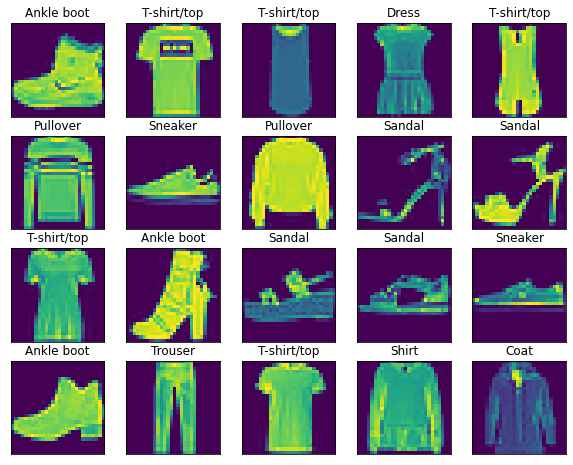

In [30]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_data[i] )
    plt.title( target_dict[(train_labels[i]) ])
    plt.xticks([])
    plt.yticks([])

In [31]:
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

In [32]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.4851 - accuracy: 0.8218 - val_loss: 0.3842 - val_accuracy: 0.8581
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3174 - accuracy: 0.8834 - val_loss: 0.3098 - val_accuracy: 0.8885
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2708 - accuracy: 0.9007 - val_loss: 0.2734 - val_accuracy: 0.8985
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2440 - accuracy: 0.9093 - val_loss: 0.2820 - val_accuracy: 0.9025
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2199 - accuracy: 0.9185 - val_loss: 0.2769 - val_accuracy: 0.9020
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1999 - accuracy: 0.9251 - val_loss: 0.2604 - val_accuracy: 0.9064
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1825 - accuracy: 0.9316 - val_loss: 0.2685 -

313/313 - 4s - loss: 0.3149 - accuracy: 0.8993


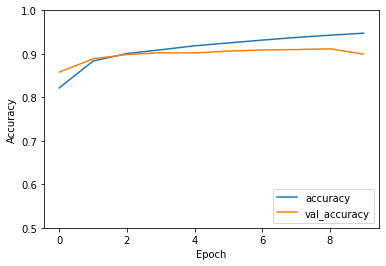

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)